**Homework 4:** *Data-Driven Modeling for Engineers* (ME 2063) - Instructor: H. Babaee,  **Due: 4:00 pm, February 9, 2022.**

**Problem 1.**
Consider the linear regression problem where the data $(x,y)$ is generated as in the following:

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

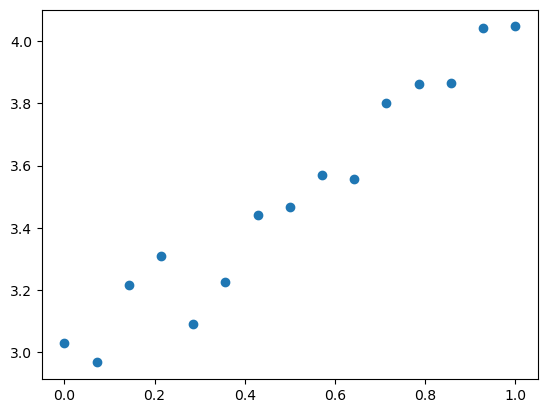

In [2]:
rng = np.random.default_rng(seed=42)

N = 15
x = np.linspace(0, 1, N) 
y = x + 3 + 0.1 * rng.standard_normal(N)

plt.plot(x, y, 'o')

Use the regression model in the form of:

$$ f(x;\theta) = \theta_1 + \theta_2 x.$$
 
1. Formulate the loss function via the least square $E(\theta_1,\theta_2)$ and find the optimal $\theta_1$ and $\theta_2$ analytically -- by solve the linear equation $\nabla_{\theta} E=0$ and find $\theta^* = A^{-1}b$, where $\nabla_{\theta} E = [\partial E/\partial \theta_1, \partial E/\partial \theta_2] $.
2.   Plot the contours of the loss function $E(\theta_1,\theta_2)$ for $\theta_1 \in [2,4]$ and $\theta_2 \in [0,2]$ and show the optimal point found in Part 1 on this plot. 
3. Now let us solve the same optimization problem iteratively. Take $\theta^{(0)}= [0.5, 0.5]$ as the intial guess and use gradient descent algorithm to solve the above regression (i.e., optimization) problem.  To this end, $\theta^{(n+1)} = \theta^{(n)} -\tau \nabla_{\theta} E$, where $\tau$ is the *learning rate*. Use $\tau = 0.01$. Continue the iterations until $\|\nabla_{\theta} E \| < 10^{-6}$. We refer to this condition as the stopping criterion.  Plot the hisotry of iterations ($\theta^{(n)}$) for all $n$ on the  figure produced in Part 2. 
4. In a separate figure, plot  the loss function $E(\theta_1^{(n)},\theta_2^{(n)})$ versus iteration counts ($n$).  
4. What is the value of $\theta$ at the final iteration? Compare the value of $\theta$ obtained   iteratively in Part 3 with the analytical value of $\theta$ obtained in Part 1. Explain the difference between the two. How can this difference be made smaller?
5.  Why are $[\theta_1,\theta_2]$ obtained from Part 3  different from $\theta=[3,1]$, which are the intercept and slope   used to generate the data? Can the difference between $\theta$ obtained iteratively in Part 3 and $\theta=[3,1]$ be made smaller?  Please justify your answer.   

In [3]:
def poly_basis(K):
    def phi(x):
        return x[:,np.newaxis] ** np.arange(K)
    return phi

phi = poly_basis(K=2)
phi(x).shape

(15, 2)

In [4]:
def linear_fit(x, y, basis):
    phi = basis(x)
    A, b = phi.T @ phi, phi.T @ y
    return np.linalg.solve(A, b)

theta_opt = linear_fit(x, y, phi)
theta_opt.shape

(2,)

In [83]:
def linear_model(x, theta, basis):
    phi = basis(x)
    return phi @ theta

def mse(y_pred, y_true):
    return np.mean((y_pred - y_true)**2) / 2

dim = 100
theta1 = np.linspace(2, 4, dim)
theta2 = np.linspace(0, 2, dim)

error_surface = np.zeros((dim, dim))

for i in range(dim):
    for j in range(dim):
        theta = [theta1[i], theta2[j]]
        y_pred = linear_model(x, theta, phi)
        error_surface[i,j] = mse(y_pred, y)

error_surface.shape

(100, 100)

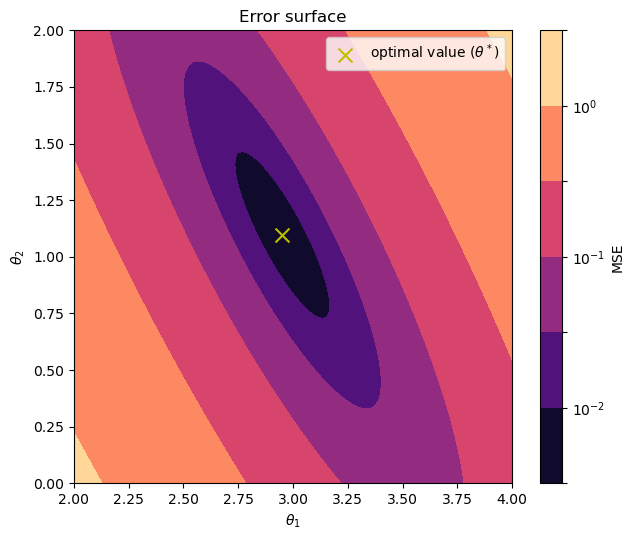

In [88]:
fig, ax = plt.subplots(figsize=(6.5,5.5))
ax.set_title('Error surface')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
CS = ax.contourf(
    theta1, theta2, error_surface.T,
    levels=np.logspace(-2.5, 0.5, 7),
    norm=mpl.colors.LogNorm(),
    cmap='magma'
)
fig.colorbar(CS, label='MSE')
ax.scatter(theta_opt[0], theta_opt[1], marker='x', color='y', s=100, label=r'optimal value ($\theta^*$)')
ax.legend()
fig.tight_layout()

In [89]:
theta = np.array([0.5, 0.5]) # initial weights
tau = 1e-2                   # learning rate
eps = 1e-6                   # tolerance

iters = []
thetas = []
errors = []

i = 0
while True:

    y_pred = phi(x) @ theta
    error = mse(y_pred, y)

    iters.append(i)
    thetas.append(theta)
    errors.append(error)
        
    grad_theta = phi(x).T @ (y_pred - y)
    grad_norm = np.linalg.norm(grad_theta)
    #print(f'iteration {i}\ttheta={theta}\terror={error:.6f}\tgrad_norm={grad_norm:.6f}')
    
    if grad_norm < eps:
        break

    theta = theta - tau * grad_theta
    i += 1

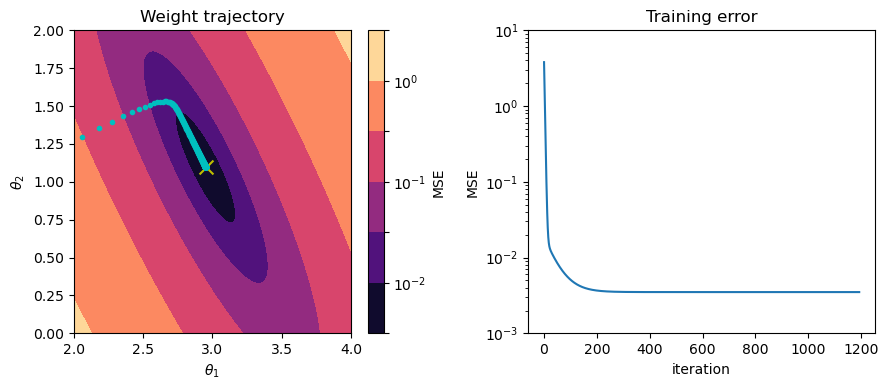

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

ax[0].set_title('Weight trajectory')
ax[0].set_xlabel(r'$\theta_1$')
ax[0].set_ylabel(r'$\theta_2$')

CS = ax[0].contourf(
    theta1, theta2, error_surface.T,
    levels=np.logspace(-2.5, 0.5, 7),
    norm=mpl.colors.LogNorm(),
    cmap='magma'
)
fig.colorbar(CS, label='MSE')

thetas = np.array(thetas)
ax[0].scatter(theta_opt[0], theta_opt[1], marker='x', color='y', s=100, label=r'optimal value ($\theta^*$)')
ax[0].scatter(thetas[:,0], thetas[:,1], marker='.', color='c')
ax[0].set_xlim(2, 4)
ax[0].set_ylim(0, 2)

ax[1].set_title('Training error')
ax[1].plot(iters, errors)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].set_ylim(1e-3, 1e1)

fig.tight_layout()

In [102]:
print(theta_opt, thetas[-1], np.linalg.norm(theta_opt - thetas[-1]))

[2.9514618  1.09657317] [2.95146138 1.09657394] 8.849543421478297e-07


The weights obtained from the closed form solution for the regression problem are $[2.9514618, 1.09657317]$, while the weights obtained using gradient descent are $[2.95146138, 1.09657394]$. The norm of the difference between these is 8.45e-7, which is very small. We know that there is a unique numerical solution for the linear regression problem, and the error surface is convex. Therefore, we can get very close to the global minimum using gradient descent with a reasonable choice of learning rate and stopping criteria.

It should be noted that the difference between these estimated weights and the true weights of $[3, 1]$ is much larger. This is due to the noise added to the dataset initially. For this particular dataset, this is irreducible error, as even a model that perfectly interpolates the training data points will still have this error compared to the true model from which the data were sampled. However, if we have the ability to sample more data, we can reduce the error by training on a larger data set which provides a more representative sample of the data-generating model.

**Problem 2.**
Consider the nonlinear regression problem where the data $(x,y)$ is generated as in the following:

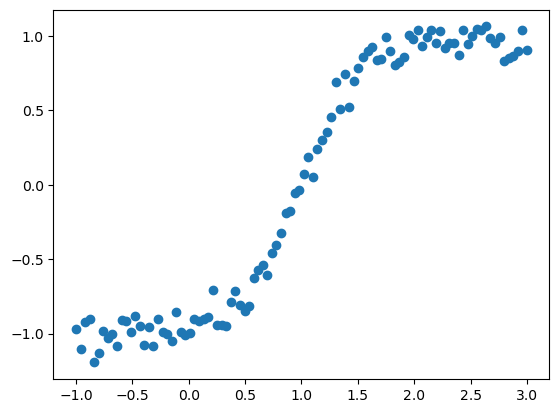

In [128]:
rng = np.random.default_rng(seed=42)

N = 100
x = np.linspace(-1, 3, N) 
y = np.tanh(2*x-2) + 0.1*rng.standard_normal(N)

plt.plot(x, y, 'o')

Use the regression model in the form of:

$$ f(x;\theta) = \tanh{(\theta_1  x + \theta_2)}.$$
 
1. Formulate the loss function via the least square $E(\theta_1,\theta_2)$.
2.   Plot the contours of the loss function $E(\theta_1,\theta_2)$ for $\theta_1 \in [1,3]$ and $\theta_2 \in [-3,-1]$. 
3. Similar to Problem 1, solve the above nonlinear optimization problem iteratively. Take $\theta^{(0)}= [1.5, -2.5]$ as the intial guess and use gradient descent algorithm.  Use an appropriate learning rate and  stopping criterion. Report  the value of $\theta$ at the final iteration
4. In a separate figure, plot  the loss function $E(\theta_1^{(n)},\theta_2^{(n)})$ versus iteration counts ($n$).  

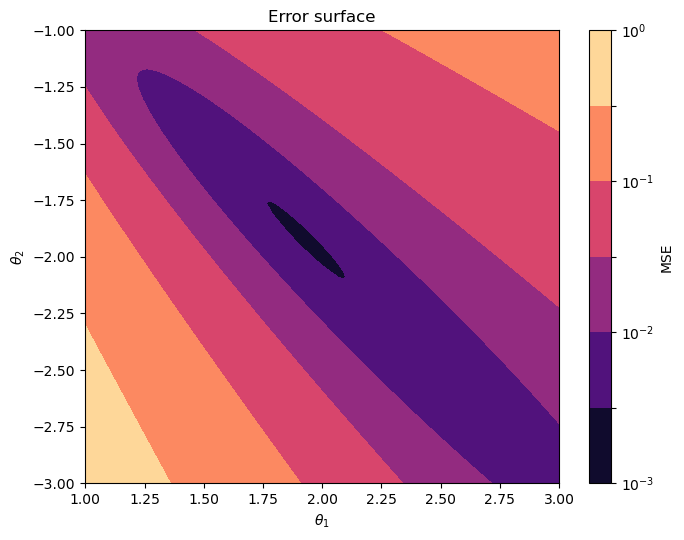

In [156]:
dim = 100
theta1 = np.linspace(1, 3, dim)
theta2 = np.linspace(-3, -1, dim)

error_surface = np.zeros((dim, dim))

for i in range(dim):
    for j in range(dim):
        theta = [theta2[j], theta1[i]]
        y_pred = np.tanh(linear_model(x, theta, phi))
        error_surface[i,j] = mse(y_pred, y)

fig, ax = plt.subplots(figsize=(7,5.5))
ax.set_title('Error surface')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
CS = ax.contourf(
    theta1,
    theta2,
    error_surface.T,
    levels=np.logspace(-3, 0, 7),
    norm=mpl.colors.LogNorm(),
    cmap='magma'
)
fig.colorbar(CS, label='MSE')
fig.tight_layout()

In [157]:
theta = np.array([-2.5, 1.5]) # initial weights
tau = 1e-3                    # learning rate
eps = 1e-6                    # tolerance

iters = []
thetas = []
errors = []

i = 0
while True:

    y_pred = np.tanh(phi(x) @ theta)
    error = mse(y_pred, y)

    iters.append(i)
    thetas.append(theta)
    errors.append(error)
        
    grad_theta = phi(x).T @ ((y_pred - y) * (1 - y_pred**2))
    grad_norm = np.linalg.norm(grad_theta)
    #print(f'iteration {i}\ttheta={theta}\terror={error:.6f}\tgrad_norm={grad_norm:.6f}')
    
    if grad_norm < eps:
        break

    theta = theta - tau * grad_theta
    i += 1

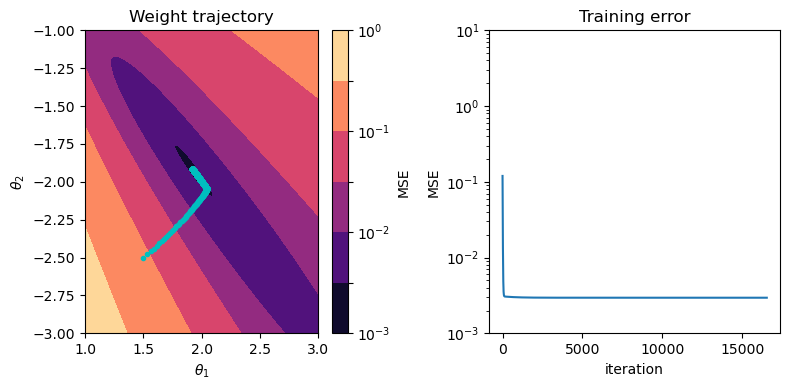

In [159]:
fig, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].set_title('Weight trajectory')
ax[0].set_xlabel(r'$\theta_1$')
ax[0].set_ylabel(r'$\theta_2$')

CS = ax[0].contourf(
    theta1,
    theta2,
    error_surface.T,
    levels=np.logspace(-3, 0, 7),
    norm=mpl.colors.LogNorm(),
    cmap='magma'
)
fig.colorbar(CS, label='MSE')
ax[0].set_xlim(1, 3)
ax[0].set_ylim(-3, -1)

thetas = np.array(thetas)
ax[0].scatter(thetas[:,1], thetas[:,0], marker='.', color='c')

ax[1].set_title('Training error')
ax[1].plot(iters, errors)
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('MSE')
ax[1].set_yscale('log')
ax[1].set_ylim(1e-3, 1e1)

fig.tight_layout()

In [161]:
print(thetas[-1][::-1])

[ 1.92174797 -1.91470659]


The final value of the weights for the nonlinear model are $\theta = [1.92174797, -1.91470659]$.